<a href="https://colab.research.google.com/github/LeaslyG/IAVIU/blob/main/Trabajo_pr%C3%A1ctico_LeaslyGarc%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Leasly M. García Arana  <br>
Url:
Google Colab:
Problema:
>1. Sesiones de doblaje <br>

Descripción del problema:
Se precisa coordinar el doblaje de una película. Los actores del doblaje deben **coincidir en las tomas en las que sus personajes aparecen juntos** en las diferentes tomas. Los actores de doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de grabación independientemente del número de tomas que se graben.
No es posible grabar más de **6 tomas por día**. El objetivo es planificar las sesiones por día de manera que el gasto por los servicios de los actores de doblaje sea el menor posible.
Los datos son:
Número de actores 10
Número de tomas 30
1: indica que el actor participa en la toma; 0: en el caso contrario

Actores/tomas: Datos problema doblaje(30 tomas, 10 actores) - Hoja 1.csv


# Nueva sección

#Modelo
- ¿Como represento el espacio de soluciones?

- ¿Cual es la función objetivo?

- ¿Como implemento las restricciones?

*Xij:* La variable indica si el actor i, está asignado a la toma j

Matriz de asignación: matrix de 10 x 30 donde cada fila es un actor y cada columna es una toma. Los valores de la matriz son binarios.

Función objetivo: Minimización. 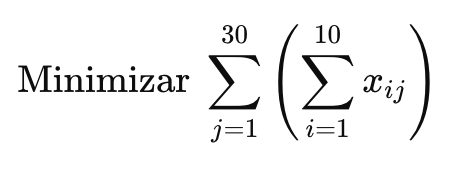

Restricciones:

-Cada toma tiene por lo menos un actor asignado: *Xij* >= 1 para *j*= 1,2,3...30
-No se pueden grabar más de 6 tomas al día: *Xij* <= 6 para *i*= 1,2,3...10
-Se tiene que minimizar las veces que un actor acude a llamado
-Cada toma solo se puede asignar una vez

Para implementar las restricciones tenemos que analizar el problema, designamos un máximo de 6 tomas al día (llevando un controlador de las tomas que no supere el límite permitido).
Se tiene que verificar que al signar una toma en un día los actores que participan sean los mismos que aparecen signados en el dataframe.
Para minimizar las veces que un actor es llamado se puede asignar las tomas de forma que los actores participen en el mayor número de tomas el mismo día, esto también reduce la cantidad de días.
Para asegurarnos que una toma se asigne una sola vez, llevar un registro de las que han sido asignadas.

#Diseño
- ¿Que técnica utilizo? ¿Por qué?

He dedidido utilizar meteheurística que es una técnica de optmización para encontrar soluciones aproximadas para intentar resolver problemas difíciles. Comunmente se han utilizado para resolver problemas de combinatoria como es el caso de planificación de sesiones.
He decidido hacer un algortimo genético.


#Análisis
- ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones
El problema es un problema NP-difícil y se representas con una complejidad de O (n!)
El espacio de soluciones está dado por las posibles combinaciones de tomas que se puede hacer cada día. Se calcula de la siguiente forma:
N=Número de tomas (N)x(N-6)x(N-12)x(N-18)x(N-24)
Espacio de soluciones=30x24x18x12x6= 1 866 240

In [1]:
import pandas as pd
import numpy as np
import random

from google.colab import files
uploaded = files.upload()


Saving Datos problema doblaje(30 tomas, 10 actores) - Hoja 1.csv to Datos problema doblaje(30 tomas, 10 actores) - Hoja 1.csv


In [2]:
nombre_archivo = list(uploaded.keys())[0]
df = pd.read_csv(nombre_archivo)
df = df.drop(df.index[0])
df = df.reset_index(drop=True)

nuevos_nombres = ['', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'actor6', 'actor7', 'actor8', 'actor9', 'actor10','Columna12','Columna13']
df.columns = nuevos_nombres
df = df.drop(df.columns[[11, 12]], axis=1)
df = df.drop([30, 31])
df = df.reset_index(drop=True)

df_transpuesto= df.transpose()
df_transpuesto.columns = df_transpuesto.iloc[0]
df_doblaje = df_transpuesto[1:]
pd.set_option("display.max_columns", None)

column_sum = df_doblaje.sum().sort_values(ascending=False)
sorted_df = df_doblaje[column_sum.index]

display(sorted_df)



,1,11,12,4,10,22,26,20,25,7,6,9,3,13,5,15,2,29,8,14,24,28,27,16,23,21,19,18,17,30
actor1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
actor2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
actor3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
actor4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
actor5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
actor6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
actor7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
actor8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
actor9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
actor10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import pandas as pd
import random

df = pd.DataFrame(sorted_df)

NUM_ACTORES = 10
MAX_TOMAS_POR_DIA = 6
POBLACION_INICIAL = 100
NUM_GENERACIONES = 100
PROBABILIDAD_MUTACION = 0.3
tomas_asignadas = set()

def evaluar_solucion(solucion):
    return sum(1 for grupo in solucion if grupo)

def generar_solucion_aleatoria():
    global tomas_asignadas
    solucion = [[] for _ in range(NUM_ACTORES)]
    tomas_disponibles = list(set(df.columns.tolist()) - tomas_asignadas)
    random.shuffle(tomas_disponibles)

    for toma in tomas_disponibles:
        for actor in solucion:
            if len(actor) < MAX_TOMAS_POR_DIA:
                actor.append(toma)
                tomas_asignadas.add(toma)
                break
    return solucion

def cruzar(padre1, padre2):
    punto_cruce = random.randint(1, min(len(padre1), len(padre2)) - 1)
    hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
    hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]
    return hijo1, hijo2

def mutar(solucion):
    global tomas_asignadas
    if random.random() < PROBABILIDAD_MUTACION:
        idx_actor = random.randint(0, NUM_ACTORES - 1)
        if len(solucion[idx_actor]) > 0:
            idx_toma = random.randint(0, len(solucion[idx_actor]) - 1)
            tomas_restantes = list(set(df.columns.tolist()) - tomas_asignadas - set(solucion[idx_actor]))
            if tomas_restantes:
                nueva_toma = random.choice(tomas_restantes)
                solucion[idx_actor][idx_toma] = nueva_toma
                tomas_asignadas.remove(solucion[idx_actor][idx_toma])
                tomas_asignadas.add(nueva_toma)

def seleccionar_poblacion(poblacion):
    total_fitness = sum(evaluar_solucion(solucion) for solucion in poblacion)
    seleccionados = []
    for _ in range(len(poblacion)):
        r = random.uniform(0, total_fitness)
        acumulado = 0
        for solucion in poblacion:
            acumulado += evaluar_solucion(solucion)
            if acumulado >= r:
                seleccionados.append(solucion)
                break
    return seleccionados

def algoritmo_genetico():
    poblacion = [generar_solucion_aleatoria() for _ in range(POBLACION_INICIAL)]
    for _ in range(NUM_GENERACIONES):
        padres = seleccionar_poblacion(poblacion)
        nueva_poblacion = []
        while len(nueva_poblacion) < POBLACION_INICIAL:
            padre1, padre2 = random.sample(padres, 2)
            hijo1, hijo2 = cruzar(padre1, padre2)
            mutar(hijo1)
            mutar(hijo2)
            nueva_poblacion.extend([hijo1, hijo2])
        poblacion = seleccionar_poblacion(nueva_poblacion)
    poblacion.sort(key=evaluar_solucion)
    mejor_solucion = poblacion[0:POBLACION_INICIAL//10]
    mejor_solucion.sort(key=len)
    return mejor_solucion[0]

def imprimir_mejor_solucion(mejor_solucion):
    costo_total = 0
    for idx, grupo in enumerate(mejor_solucion):
        if grupo:
            print(f"Día {idx + 1}:")
            actores_en_dia = set()
            for toma in grupo:
                actores_en_toma = [indice + 1 for indice, valor in enumerate(df[toma]) if valor == 1]
                print(f"Toma {toma}: Actores {actores_en_toma}")
                actores_en_dia.update(actores_en_toma)
            costo_dia = len(actores_en_dia)
            costo_total += costo_dia
            print(f"Actores en el día: {list(actores_en_dia)}")
            print(f"Costo del día: {costo_dia}\n")
    print(f"Costo total: {costo_total}")

mejor_solucion = algoritmo_genetico()
imprimir_mejor_solucion(mejor_solucion)


Día 1:
Toma 25: Actores [1, 2, 4, 10]
Toma 10: Actores [1, 2, 6, 9]
Toma 19: Actores [1, 3]
Toma 27: Actores [4, 5]
Toma 20: Actores [1, 3, 4, 5]
Toma 28: Actores [1, 4]
Actores en el día: [1, 2, 3, 4, 5, 6, 9, 10]
Costo del día: 8

Día 2:
Toma 7: Actores [1, 2, 4, 5]
Toma 21: Actores [6, 8]
Toma 9: Actores [1, 2, 4]
Toma 26: Actores [1, 3, 5, 9]
Toma 16: Actores [4, 10]
Toma 13: Actores [1, 4, 5]
Actores en el día: [1, 2, 3, 4, 5, 6, 8, 9, 10]
Costo del día: 9

Día 3:
Toma 3: Actores [2, 5, 7]
Toma 15: Actores [1, 2, 7]
Toma 30: Actores [1, 4]
Toma 2: Actores [3, 4, 5]
Toma 22: Actores [1, 2, 3, 4]
Toma 4: Actores [1, 2, 7, 8]
Actores en el día: [1, 2, 3, 4, 5, 7, 8]
Costo del día: 7

Día 4:
Toma 11: Actores [1, 2, 3, 5, 8]
Toma 18: Actores [3, 6]
Toma 6: Actores [1, 2, 4, 5]
Toma 1: Actores [1, 2, 3, 4, 5]
Toma 8: Actores [1, 2, 6]
Toma 23: Actores [1, 3]
Actores en el día: [1, 2, 3, 4, 5, 6, 8]
Costo del día: 7

Día 5:
Toma 29: Actores [1, 5, 6]
Toma 12: Actores [1, 2, 3, 4, 6]
Toma